## The purpose of this notebook is to prototype the data visualization functionality

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load up notes.npy and cut it slightly short to prototype the visualization
notes = np.load('notes.npy')


In [ ]:
print(len(notes))

def slice_notes(notes, start=0, end=2):
    '''
    Takes a notes array and slices it between start and end in seconds
    '''
    assert start < end, "Error: start value must be less than end value"

    start_tick, end_tick = start*100, end*100
    return notes[start_tick:end_tick]

sliced_notes = slice_notes(notes, start = 5, end = 9)


In [18]:
import pickle
import pandas as pd
from pathlib import Path
 
# It's going to be important to have the one hot encoding : note key for visualization
# This needs to be generated from note_keys.csv

# Open note keys as a dataframe
note_keys_path = Path.cwd().parent / 'Documentation' / 'note_keys.csv'

note_keys_df = pd.read_csv(note_keys_path)

note_dict = note_keys_df[['One Hot Representation', 'Note']].set_index('One Hot Representation').to_dict()['Note']

# Save this for later
with open('note_dict.pkl', 'wb') as f:
    pickle.dump(note_dict, f)
f.close()

| Note | Int Representation |
|------|--------------------|
| G    | 1                  |
| R    | 2                  |
| Y    | 3                  |
| B    | 4                  |
| O    | 5                  |
| open | 6                  |

Instead of string representations, change to lists of integers corresponding to the notes that are within

Call this "viz_dict"

In [28]:
viz_dict = {}
string_to_list = {
    'G' : 1,
    'R' : 2,
    'Y' : 3,
    'B' : 4,
    'O' : 5,
    'o' : 6
}

for k, v in note_dict.items():
    viz_dict[k] = [string_to_list[x] for x in v if x not in ['o', 'p', 'e', 'n']]
    if viz_dict[k] == []:
        viz_dict[k] = [6]

# Save for later
with open('viz_dict.pkl', 'wb') as f:
    pickle.dump(viz_dict,f)
f.close()

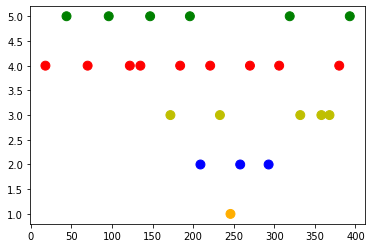

In [53]:
# Encodes the y position of the notes
note_idx_to_y = {
    1 : 5,
    2 : 4,
    3 : 3,
    4 : 2,
    5 : 1
}

note_idx_to_c = {
    1 : 'g',
    2 : 'r',
    3 : 'y',
    4 : 'b',
    5 : '#ffae00'
}

# First, create an x vector, a y vector, and a color vector
def create_scatter_arrays(notes):
    '''
    Takes a notes array and creates three vectors:
    -   x : x positions of scatter points
    -   x_lines : x position of open notes
    -   y : y positions of scatter points
    -   c : color array of scatter points
    '''
    x = []
    y = []
    c = []

    scaler = 1 # This scaler to scale the y dimension up or down

    # Loop through the whole notes array
    for idx, note in enumerate(notes):
        if not note: # Skip zeros
            continue

        chord = viz_dict[note]
        for n in chord:
            if n != 6:  # If not an open note
                x.append(idx)
                y.append(note_idx_to_y[n]*scaler)
                c.append(note_idx_to_c[n])
            else:
                x_lines.append(idx)

        
    return x, y, c

x, y, c = create_scatter_arrays(sliced_notes)

plt.scatter(x, y, color=c, s = 80)